In [1]:
import os
import sys
import matplotlib.pyplot as plt
import sklearn
import librosa.display
import numpy

fs=22050
#fs=11025

In [2]:
def create_song_list(walk_dir):
    x = {}
    #c = 0
    for root, subdirs, files in os.walk(walk_dir):
        for filename in files:
            if ".mp3" in filename:
                file_path = os.path.join(root, filename)
                artist=root.split("\\")[1]
                song=filename.split(" ",1)[1].split(".")[0]
                if artist not in x:
                    x[artist] = []
                x[artist].append((song,file_path))
                #print(file_path)
                #x.append({"artist": artist,"song": song,"path":file_path})
                #a, fs = librosa.load(file_path)
                #mfcc = librosa.feature.mfcc(a, sr=fs).t
                #x.append({"artist": artist,"song": song,"mfcc":mfcc})
    return(x)

In [3]:
y=create_song_list("canzoni")

In [2]:
#function to create a list of {artist,song,mfcc} with scaled mfcc
#one can modify parameters, to load different parts of song
#and maybe a different sampling rate
scaler = sklearn.preprocessing.StandardScaler()
def create_mfcc(walk_dir):
    x = []
    #c = 0
    for root, subdirs, files in os.walk(walk_dir):
        for filename in files:
            if ".mp3" in filename:
                file_path = os.path.join(root, filename)
                artist=root.split("\\")[1]
                song=filename.split(" ",1)[1].split(".")[0]
                print("processing:"+song)
                a = librosa.load(file_path,duration=50,offset=10,sr=fs)[0]
                mfcc = librosa.feature.mfcc(a, sr=fs).T
                mfcc = scaler.fit_transform(mfcc)
                x.append({"artist": artist,"song": song,"mfcc":mfcc})
    return(x)

In [3]:
#create list of  {artist, song, mfcc} using above function
x=create_mfcc("canzoni")

c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarni

c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarni

artist: Simon & Garfunkel
song: Sparrow [Live]
means:
[ 7.47133413e-08  2.50704772e-08  1.10198719e-07  9.35300335e-08
  4.78718825e-08 -5.09711029e-08 -5.58966491e-08 -1.60938072e-07
  8.71378987e-08  4.94768351e-08 -1.32270292e-08  1.73777703e-08
  1.15252249e-07 -1.21713569e-07 -1.59388467e-08  5.84701105e-08
  9.52456745e-08 -1.13453595e-07 -1.09095319e-08  2.19712568e-08]
var:
[0.9999995  0.99999964 1.0000006  1.0000002  1.0000001  0.99999964
 1.0000008  1.0000004  1.0000006  0.9999994  0.99999875 0.99999976
 1.0000011  1.         1.0000004  1.0000004  1.0000002  0.9999999
 1.0000007  0.9999995 ]


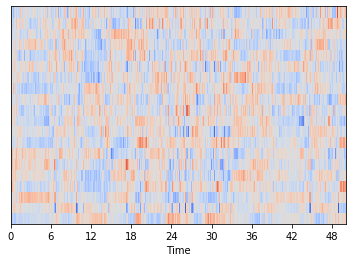

In [8]:
#test to see if what we have extracted make sense
i=40
print("artist: "+x[i]["artist"])
print("song: "+x[i]["song"])
mfcc=x[i]["mfcc"]
print("means:")
print(mfcc.mean(axis=0))
print("var:")
print(mfcc.var(axis=0))
librosa.display.specshow(mfcc.T, sr=fs, x_axis='time')

In [9]:
#create a big matrix containing all mfcc of all songs of all artists
features=numpy.empty((1,20))
for t in x:
    features=numpy.vstack((features, t["mfcc"]))
features=numpy.delete(features,0,0)

In [10]:
#creating labels of each frame relative to the artist
#0= Ed Sheeran
#1= Luciano Ligabue
#2= Simon & Garfunkel

ES,LL,SG=0,0,0
for t in x:
    if t["artist"]=="Ed Sheeran":
        ES=ES+t["mfcc"].shape[0]
    elif t["artist"]=="Ligabue":
        LL=LL+t["mfcc"].shape[0]
    elif t["artist"]=="Simon & Garfunkel":
        SG=SG+t["mfcc"].shape[0]
#print(ES)
#print(LL)
#print(SG)
labels = numpy.concatenate((numpy.zeros(ES), numpy.ones(LL),numpy.full(SG, 2)))
#labels

In [18]:
#creating also song labels
song_labels=[]
for t in x:
    for _ in range(t["mfcc"].shape[0]):
        song_labels.append(t["song"])
#len(song_labels)

106019

In [19]:
#create train/test split
X_train, X_test, y_train, y_test ,song_train, song_test = sklearn.model_selection.train_test_split(features, labels, song_labels, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(song_train))
print(len(song_test))

(79514, 20)
(26505, 20)
(79514,)
(26505,)
79514
26505


In [12]:
#using knn to classify frames to each artist
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[7695,  444,  629],
       [ 581, 6062,  379],
       [ 879,  581, 9255]], dtype=int64)

In [29]:
#classify each song to the artist for which the majority of its
#frames have been classified
for canzone in set(song_labels):
    v=[y_pred[u] for u in range(len(y_pred)) if song_labels[u] == canzone]
    

In [30]:
v

[]